In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, scorer, precision_score, recall_score

In [0]:
%matplotlib inline

In [0]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Google Collab/student-mat.csv", delimiter = ';')

In [0]:
binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [0]:
numeric_variables = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'goout', 'health', 'absences']

In [0]:
categorical_variables = ['Fjob', 'Mjob', 'reason', 'guardian']

In [0]:
sample_dataset = dataset.copy()
sample_dataset1 = dataset.copy()

In [0]:
not_interested = ['G1', 'G2', 'G3']

In [0]:
interested = [col for col in dataset.columns if col not in not_interested]

In [0]:
new_dataset = dataset[interested]

In [0]:
y_values = dataset['G3']

In [0]:
from collections import defaultdict
d1 = defaultdict(LabelEncoder)
d2 = defaultdict(LabelEncoder)

In [0]:
bin_values = new_dataset[binary_variables]

In [0]:
cat_values = new_dataset[categorical_variables]

In [0]:
new_cat_values = pd.get_dummies(cat_values)

In [0]:
num_values = new_dataset[numeric_variables]

In [0]:
bin_fit = bin_values.apply(lambda x: d1[x.name].fit_transform(x))

In [0]:
final_dataset = pd.concat([num_values, bin_fit, new_cat_values], axis = 1)

In [0]:
y_labels = []

for i in y_values:
    if i >= y_values.median():
        y_labels.append(1)
    else:
        y_labels.append(0)

In [22]:
x = final_dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ready_data = pd.DataFrame(x_scaled,columns=final_dataset.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(ready_data, y_labels, test_size = 0.33, random_state = 777)

In [0]:
model = KNeighborsClassifier(n_neighbors = 36, p=2)

In [25]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=36, p=2,
           weights='uniform')

In [26]:
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, n_jobs=-1, cv=3, train_sizes=np.linspace(.3, 1.0, 10), verbose=1)

[learning_curve] Training set sizes: [ 52  66  79  93 106 120 134 147 161 175]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [0]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

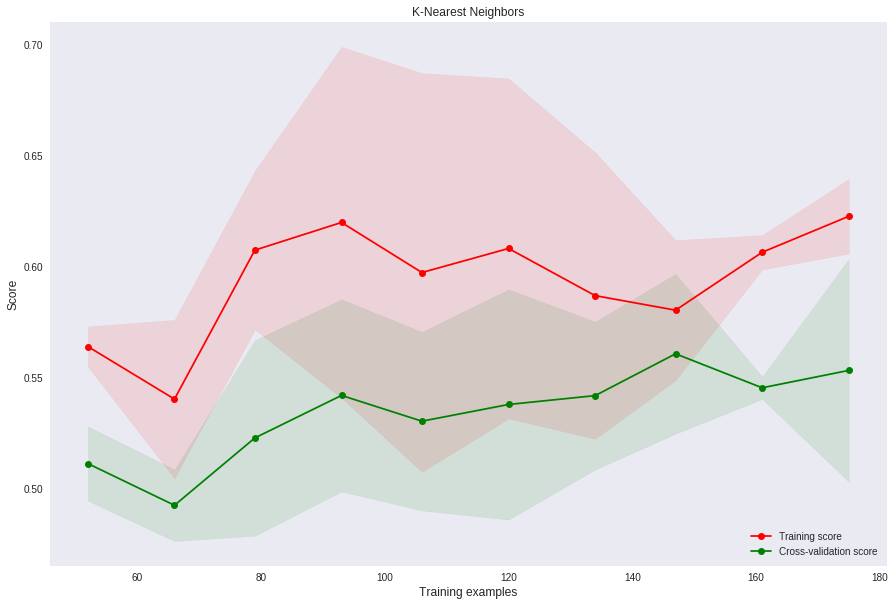

In [29]:
plt.figure(figsize=(15,10))
    
plt.grid()
    
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label = 'Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label ="Cross-validation score")
    
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1

plt.title("K-Nearest Neighbors")
plt.legend(loc = 'lower right')
plt.xlabel("Training examples", size =12)
plt.ylabel("Score", size = 12)
#plt.ylim(0.5,0.85)
plt.show()